<a href="https://colab.research.google.com/github/dharineeshramtp2000/Polynomial-Regression-Boston-Housing-Prices/blob/master/Boston_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns 

Import the Dataset 


---
It is present in the famous scikit_learn library


In [0]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()


Now creating a matrix of the dataset using pandas library


In [0]:
Dataset = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

Initially the target variable, i.e., 'Median value of owner-occupied homes in $1000s' is not present in Dataset, we now have to append them.

In [22]:
Dataset['MEDV'] = boston_dataset.target
print(Dataset)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


There are 13 independent variables amd 1 dependent variable.
So we need to see what is needed most importantly using the **Correlation Matrix**.


---


Other methods like Back Propagation/ Forward Propagation can be used. 
But **Correlation Matrix** is best for most speedy analysis.

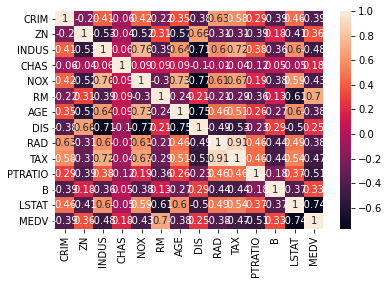

In [23]:
correlation_matrix = Dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Closer the values to 1 and -1 are choosen. It shows that they are highly correlated. Here LSTAT and RM is chosen, as the values are 07 and -0.74.


---
Hence our model is limited to only 2 independent variables.


In [0]:
X = Dataset.iloc[:,[5,12]].values
y = Dataset.iloc[:,-1].values


So here introduce the polynomial features of degree 3.

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X = poly_reg.fit_transform(X)

Feature scaling is not needed here. But its always a good practice to feature scale.

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)


Splitting the data into train and test

In [0]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X, y, test_size=0.25, random_state = 5, shuffle =True)


Importing the linear regression models(using SGD)

In [28]:
from sklearn.linear_model import SGDRegressor, LinearRegression
regressor = SGDRegressor(max_iter=10000, tol=1e-3, alpha =0.001, random_state = 0, learning_rate = 'constant' , eta0 = 0.001)
regressor.fit(X_train, y_train)


SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Predicting the output for our SGD Linear Model with the test set

In [29]:
y_pred = regressor.predict(X_test)
print("Predicted Result","  ","Actual Result")
for i in range(len(y_pred)):
  print("    ",round(y_pred[i],1),"            ",y_test[i])

Predicted Result    Actual Result
     43.2              37.6
     30.4              27.9
     24.8              22.6
     13.5              13.8
     35.1              35.2
     12.1              10.4
     31.5              23.9
     27.2              29.0
     24.8              22.8
     19.7              23.2
     33.7              33.2
     22.1              19.0
     21.9              20.3
     31.5              36.1
     26.5              24.4
     19.4              17.2
     14.2              17.9
     17.7              19.6
     13.6              19.7
     21.0              15.0
     12.2              8.1
     22.4              23.0
     43.6              44.8
     23.2              23.1
     29.5              32.2
     12.6              10.8
     26.6              23.1
     20.8              21.2
     27.5              22.2
     29.2              24.1
     12.0              17.3
     12.6              7.0
     16.7              12.7
     20.5              17.8
     25.3       

Now lets calculate the Coefficient of Determination and the RMSE for our training set

In [30]:
from sklearn.metrics import r2_score , mean_squared_error

rmse_train = (np.sqrt(mean_squared_error(y_train, regressor.predict(X_train) )))
r_squared_train = r2_score(y_train , regressor.predict(X_train))
print("R squared for the training set")
print("---------------------------------")
print(r_squared_train)
print("---------------------------------")
print("RMSEfor the training set")
print("---------------------------------")
print(rmse_train)


R squared for the training set
---------------------------------
0.746378918202155
---------------------------------
RMSEfor the training set
---------------------------------
4.642224048020089


Now lets calculate the Coefficient of Determination and the RMSE for our training set

In [31]:
rmse_test = (np.sqrt(mean_squared_error(y_test, regressor.predict(X_test) )))
r_squared_test = r2_score(y_test , regressor.predict(X_test))
print("R squared for the testing set")
print("---------------------------------")
print(r_squared_test)
print("---------------------------------")
print("RMSEfor the testing set")
print("---------------------------------")
print(rmse_test)

R squared for the testing set
---------------------------------
0.757718970401246
---------------------------------
RMSEfor the testing set
---------------------------------
4.471934172006731


The **RMSE** and the **R squared** for the test and the training set is almost the same , which has improved much better than the Multiple linear regression. 
Here the Polynomial of 3rd Degree is doing well for a descent approximation of the Boston Housing Dataset